In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense

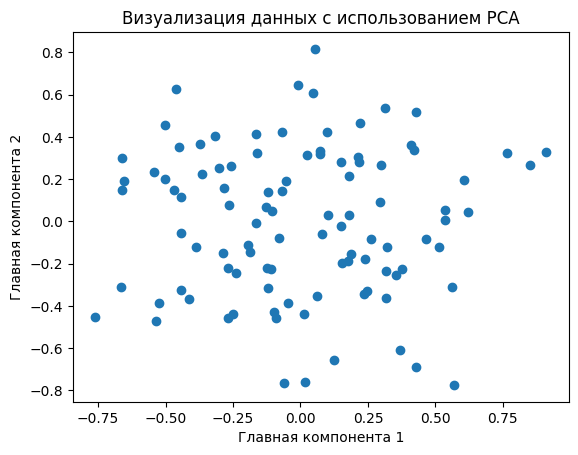

In [33]:
# Генерация случайных данных
np.random.seed(0)
X = np.random.rand(100, 10)  # 100 объектов, 10 признаков

# Применение PCA
pca = PCA(n_components=2)  # Уменьшение размерности до 2 главных компонент
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Визуализация данных с использованием PCA')
plt.show()

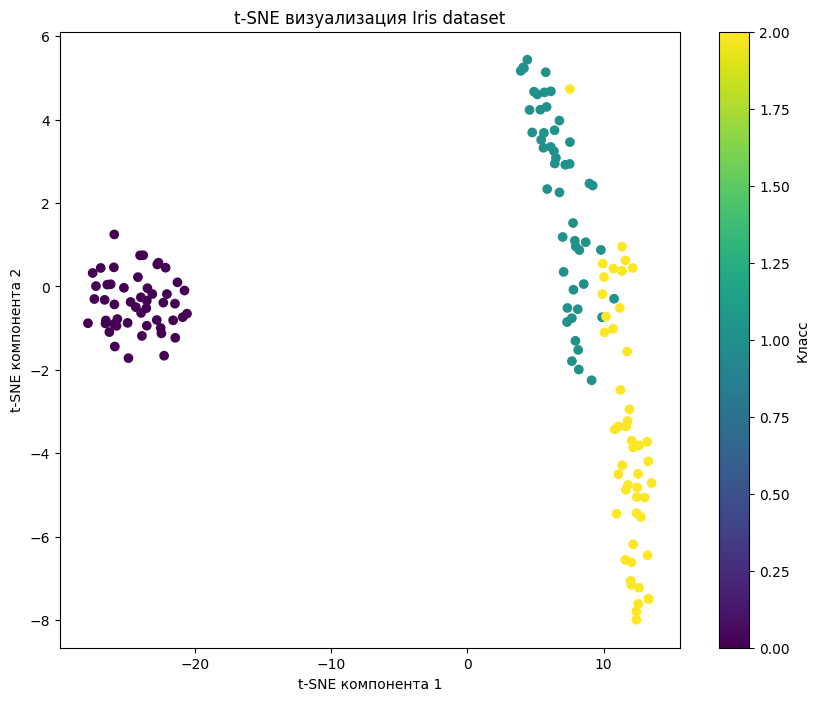

In [34]:
# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Визуализация данных после применения t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE визуализация Iris dataset')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.colorbar(label='Класс')
plt.show()

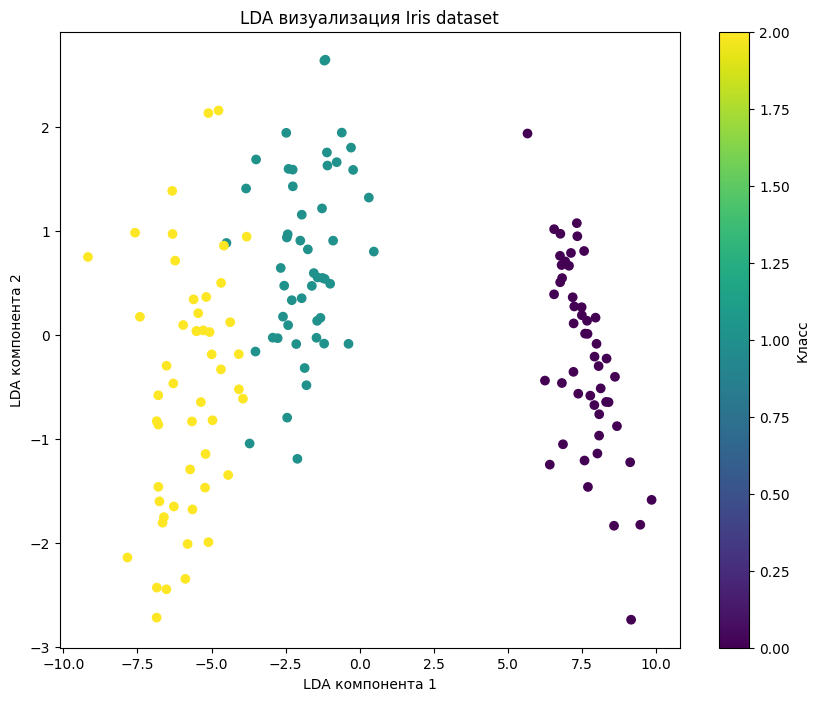

In [35]:
# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Применение LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Визуализация данных после применения LDA
plt.figure(figsize=(10, 8))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('LDA визуализация Iris dataset')
plt.xlabel('LDA компонента 1')
plt.ylabel('LDA компонента 2')
plt.colorbar(label='Класс')
plt.show()

In [40]:
# Загрузка данных
digits = load_digits()
X = digits.data
y = digits.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Нормализация данных
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Размерность кодированного представления
encoding_dim = 2

# Входной плейсхолдер
input_img = Input(shape=(64,))

# Кодированное представление
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Декодированное представление
decoded = Dense(64, activation='sigmoid')(encoded)

# Модель автоэнкодера
autoencoder = Model(input_img, decoded)

# Компиляция модели
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение модели
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# Понижение размерности
encoder = Model(input_img, encoded)
encoded_train = encoder.predict(X_train)
encoded_test = encoder.predict(X_test)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.6926 - val_loss: 0.6907
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6902 - val_loss: 0.6883
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6877 - val_loss: 0.6858
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6852 - val_loss: 0.6833
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6827 - val_loss: 0.6807
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6800 - val_loss: 0.6779
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6772 - val_loss: 0.6749
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6742 - val_loss: 0.6717
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6710 - val_loss: 0.6683
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6675 - val_loss: 0.6646
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6637 - val_loss: 0.6607
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6597 - val_loss: 0.6565


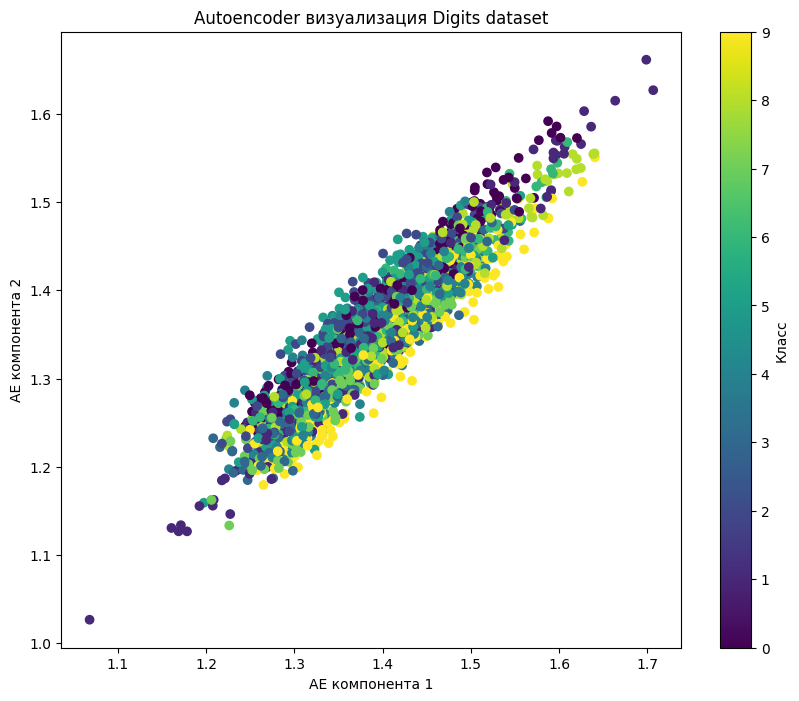

In [41]:
data_encod = np.concatenate([encoded_train, encoded_test])
plt.figure(figsize=(10, 8))
plt.scatter(data_encod[:, 0], data_encod[:, 1], c=np.concatenate([y_train, y_test]), cmap='viridis')
plt.title('Autoencoder визуализация Digits dataset')
plt.xlabel('AE компонента 1')
plt.ylabel('AE компонента 2')
plt.colorbar(label='Класс')
plt.show()